In [29]:
import xarray as xr
import os
import numpy as np
from xhistogram.xarray import histogram
import matplotlib.pyplot as plt

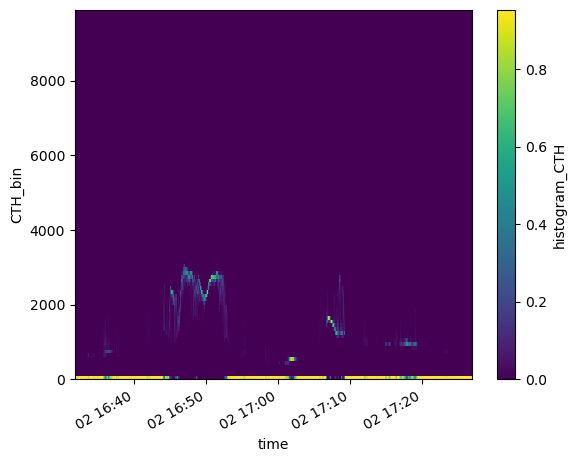

In [75]:
path = '/projekt_agmwend/data/EUREC4A/06_Flights/Flight_20200202a/VELOX/VELOX_327kveL/CTH'
list_dir = os.listdir(path)
ds = xr.open_dataset(os.path.join(path, list_dir[1]))
ds.time

CTH_hist = histogram(ds.CTH.sel(y=slice(246, 266)), bins=np.arange(0, 1e4, 1e2), dim=['x', 'y'])
(CTH_hist / (640 * 21)).plot(x='time')

In [59]:
def datetime64_to_seconds(timestamps):
    # Subtract the datetime of the Unix epoch from the input timestamps
    # The result is an array of timedeltas
    delta = timestamps - np.datetime64('1970-01-01T00:00:00')
    
    # Divide the timedeltas by the timedelta representing one second
    # The result is an array of seconds
    seconds = delta / np.timedelta64(1, 's')
    
    # Take the modulo of the seconds with the number of seconds in a day
    # This is done to ensure that the seconds are within a 24 hour period
    return seconds % (24 * 3600)

In [103]:
ds_t = datetime64_to_seconds(ds.time)
time_array = np.arange(start=ds_t.min().item(), stop=ds_t.max().item(), step=300)
CTH_hist = histogram(ds.CTH.sel(y=slice(246, 266)), bins=np.linspace(0, 10000, 101), dim=['x', 'y'])


In [162]:
cth_coarsed.coarsen(time=100, boundary='trim')

DataArrayCoarsen [windows->{'time': 100},side->left]

In [170]:
cth_coarsed = CTH_hist.coarsen(time=100, boundary='trim').mean() / (1 * 640 * 20)
cth_coarsed_time_sod = datetime64_to_seconds(cth_coarsed.time)

In [168]:
cth_coarsed.sum()

<xarray.DataArray 'histogram_CTH' ()>
array(32.)

In [150]:
CTH_hist.coarsen(time=100, boundary='trim').sum().sum(dim='CTH_bin') / (100 * 640 * 20)

<xarray.DataArray 'histogram_CTH' (time: 32)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
  * time     (time) datetime64[ns] 2020-02-02T16:32:35.400000 ... 2020-02-02T...

In [115]:

f = 'Flight_20200202a'
fnum = str(f[7:-1])

Y, M, D = fnum[0:4], fnum[4:6], fnum[6:]
altitude = 10000

In [175]:
ds_t = datetime64_to_seconds(ds.time)
time_array = np.arange(start=ds_t.min().item(), stop=ds_t.max().item(), step=300)
CTH_hist = histogram(ds.CTH.sel(y=slice(246, 266)), bins=np.linspace(0, 10000, 101), dim=['x', 'y'])

for i in range(len(cth_coarsed_time_sod)):
    #mask = np.isclose(ds_t.sod,  time_array[i], atol=600)
    #ds_matched = ds_t.where(mask).mean(dim='time')
    data = cth_coarsed.isel(time=i)
    mask = ~np.isnan(data) & (data.CTH_bin > 100)
    valid_data = data.isel(CTH_bin=mask)
    pandas_data = valid_data.to_pandas()
    pandas_data = pandas_data.iloc[::-1]
    pandas_data.index = pandas_data.index / 1e3
    sod_time = cth_coarsed_time_sod[i]
    print(f'{M}{D}_{sod_time.item():.0f}SOD.dat : {sum(data[1:]).item():.3f}')
    pandas_data.to_csv(f'~/sim_test/CF_dir/{M}{D}_{sod_time.item():.0f}SOD.dat', sep='\t', index=True, header=False, float_format='%.3f')

0202_59555SOD.dat : 0.006
0202_59658SOD.dat : 0.015
0202_59760SOD.dat : 0.207
0202_59863SOD.dat : 0.032
0202_59967SOD.dat : 0.000
0202_60071SOD.dat : 0.021
0202_60173SOD.dat : 0.005
0202_60275SOD.dat : 0.462
0202_60378SOD.dat : 0.906
0202_60480SOD.dat : 0.970
0202_60583SOD.dat : 1.000
0202_60685SOD.dat : 1.000
0202_60787SOD.dat : 0.300
0202_60890SOD.dat : 0.015
0202_60992SOD.dat : 0.003
0202_61095SOD.dat : 0.011
0202_61197SOD.dat : 0.009
0202_61299SOD.dat : 0.445
0202_61402SOD.dat : 0.009
0202_61504SOD.dat : 0.008
0202_61607SOD.dat : 0.546
0202_61709SOD.dat : 0.829
0202_61811SOD.dat : 0.005
0202_61914SOD.dat : 0.044
0202_62016SOD.dat : 0.003
0202_62119SOD.dat : 0.048
0202_62221SOD.dat : 0.173
0202_62323SOD.dat : 0.322
0202_62426SOD.dat : 0.003
0202_62528SOD.dat : 0.005
0202_62631SOD.dat : 0.009
0202_62733SOD.dat : 0.000


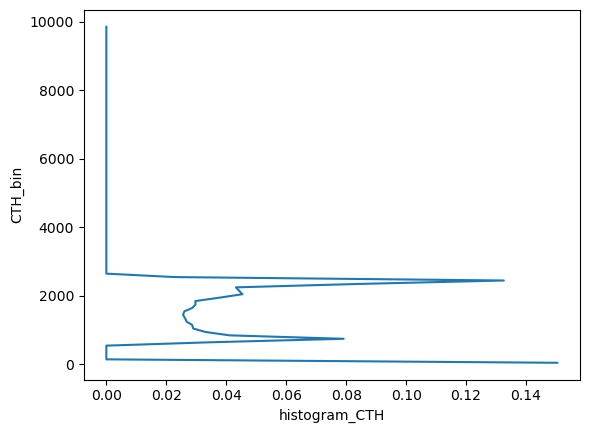

In [58]:
CTH_hist = histogram(ds.CTH.sel(y=slice(246, 266)).isel(time=np.arange(1000, 1010)), bins=np.arange(0, 1e4, 1e2), dim=['x', 'y', 'time'])
(CTH_hist / CTH_hist.sum()).plot(y='CTH_bin')

In [45]:
L = len(ds.time)



3293

0202_52995SOD.dat : 0.001
0202_53098SOD.dat : 0.000
0202_53200SOD.dat : 0.000
0202_53302SOD.dat : 0.000
0202_53405SOD.dat : 0.000
0202_53507SOD.dat : 0.000
0202_53610SOD.dat : 0.000
0202_53712SOD.dat : 0.000
0202_53814SOD.dat : 0.000
0202_53917SOD.dat : 0.000
0202_54019SOD.dat : 0.000
0202_54122SOD.dat : 0.000
0202_54224SOD.dat : 0.035
0202_54326SOD.dat : 0.414
0202_54429SOD.dat : 0.582
0202_54531SOD.dat : 0.072
0202_54634SOD.dat : 0.366
0202_54736SOD.dat : 0.431
0202_54838SOD.dat : 0.293
0202_54941SOD.dat : 0.389
0202_55043SOD.dat : 0.270
0202_55146SOD.dat : 0.165
0202_55248SOD.dat : 0.795
0202_55350SOD.dat : 0.456
0202_55453SOD.dat : 0.557
0202_55555SOD.dat : 0.504
0202_55658SOD.dat : 0.826
0202_55760SOD.dat : 0.491
0202_55862SOD.dat : 0.100
0202_55970SOD.dat : 0.101
0202_56075SOD.dat : 0.007
0202_56177SOD.dat : 0.004
0202_56280SOD.dat : 0.000
0202_48901SOD.dat : 0.046
0202_49004SOD.dat : 0.008
0202_49106SOD.dat : 0.032
0202_49209SOD.dat : 0.094
0202_49311SOD.dat : 0.007
0202_49413SO

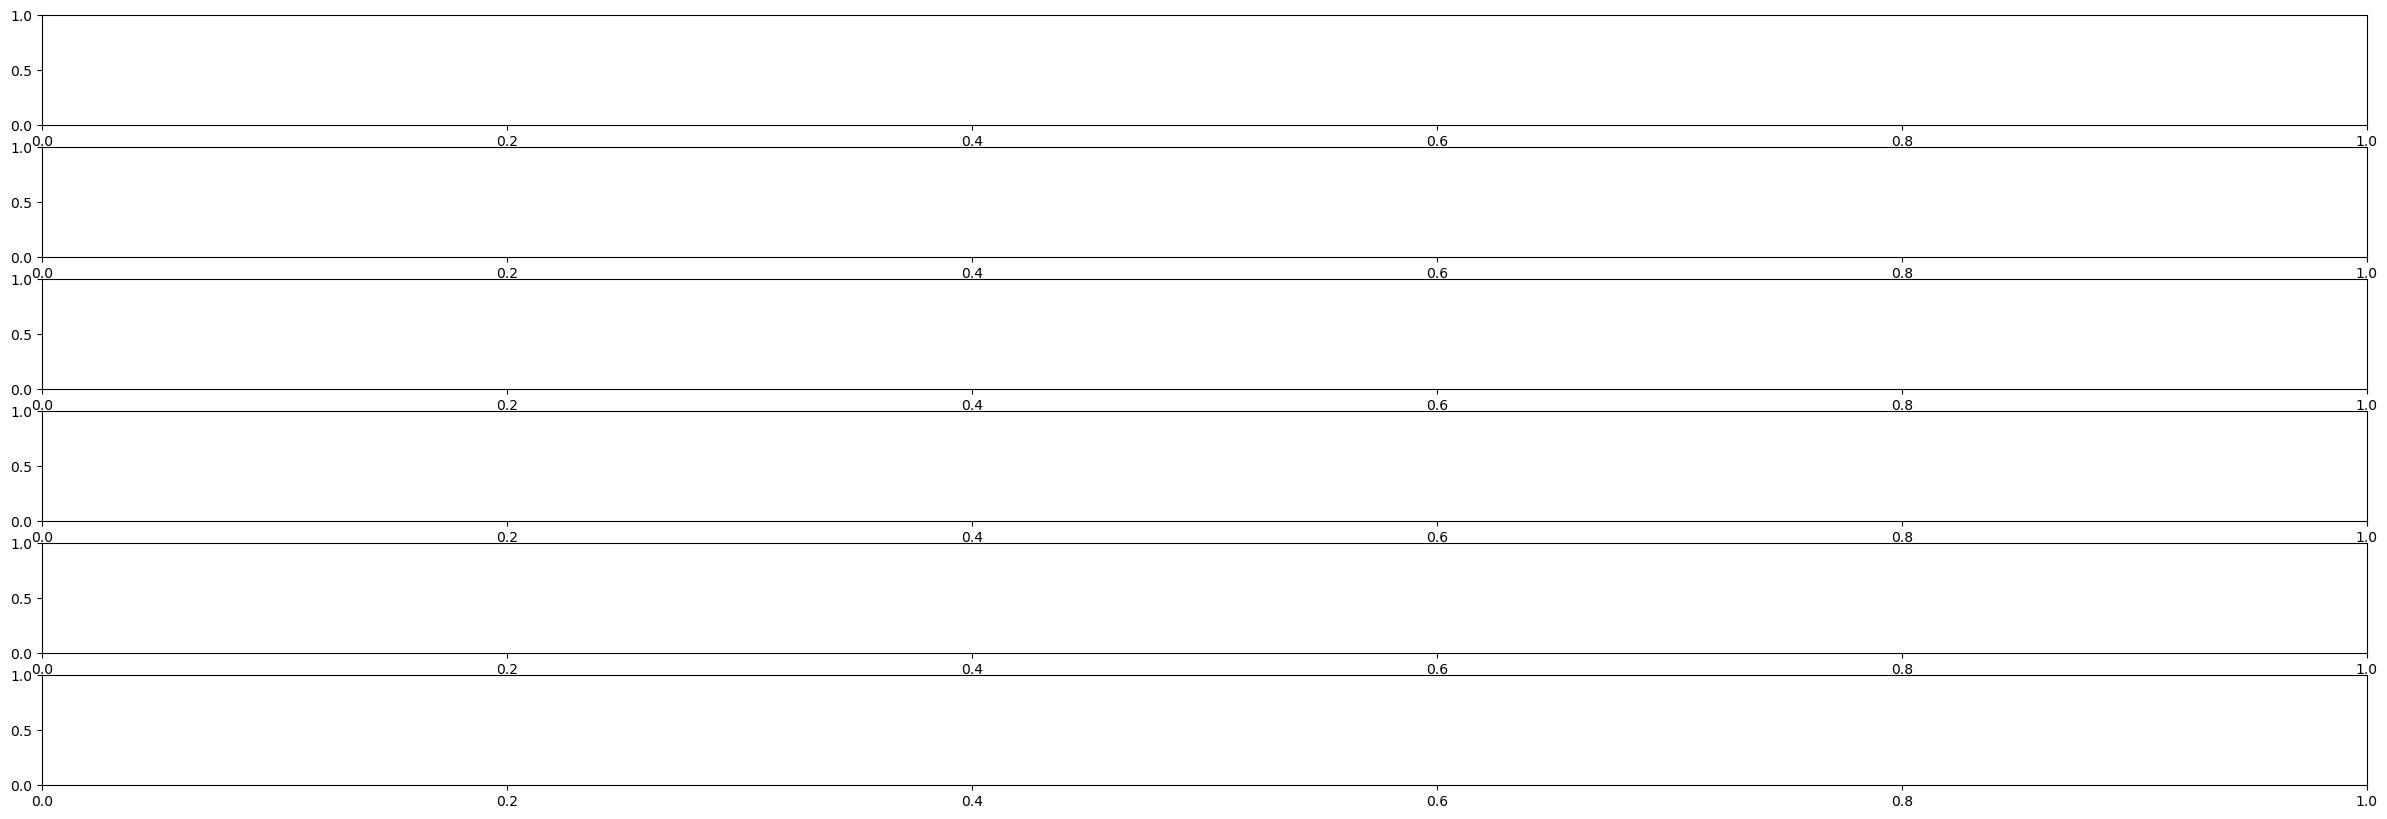

In [177]:
path = '/projekt_agmwend/data/EUREC4A/06_Flights/Flight_20200126a/VELOX/VELOX_327kveL/CTH'
list_dir = os.listdir(path)


fig, ax = plt.subplots(len(list_dir), 1, figsize=(30, 10))


for file in list_dir:
    ds = xr.open_dataset(os.path.join(path, file))
    #CTH_hist = histogram(ds.CTH.sel(y=slice(246, 266)), bins=np.arange(0, 1e4, 1e2), dim=['x', 'y'])
    ds_t = datetime64_to_seconds(ds.time)
    time_array = np.arange(start=ds_t.min().item(), stop=ds_t.max().item(), step=300)
    CTH_hist = histogram(ds.CTH.sel(y=slice(246, 266)), bins=np.linspace(0, 10000, 101), dim=['x', 'y'])
    cth_coarsed = CTH_hist.coarsen(time=100, boundary='trim').mean() / (1 * 640 * 20)
    cth_coarsed_time_sod = datetime64_to_seconds(cth_coarsed.time)

    for i in range(len(cth_coarsed_time_sod)):
        #mask = np.isclose(ds_t.sod,  time_array[i], atol=600)
        #ds_matched = ds_t.where(mask).mean(dim='time')
        data = cth_coarsed.isel(time=i)
        mask = ~np.isnan(data) & (data.CTH_bin > 100)
        valid_data = data.isel(CTH_bin=mask)
        pandas_data = valid_data.to_pandas()
        pandas_data = pandas_data.iloc[::-1]
        pandas_data.index = pandas_data.index / 1e3
        sod_time = cth_coarsed_time_sod[i]
        print(f'{M}{D}_{sod_time.item():.0f}SOD.dat : {sum(data[1:]).item():.3f}')
        pandas_data.to_csv(f'~/sim_test/CF_dir/{M}{D}_{sod_time.item():.0f}SOD.dat', sep='\t', index=True, header=False, float_format='%.3f')

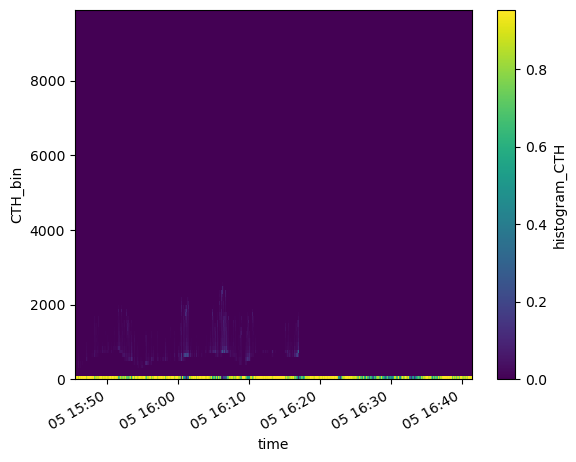

In [62]:
ds = ds.assign_coords(x = np.arange(0, 640))
ds = ds.assign_coords(y = np.arange(0, 512))

In [73]:
import matplotlib.pyplot as plt

"with open('cloud_fraction_file_test.out', 'w') as f:\n    for i in range(len(ds.CTH.time)):\n     "

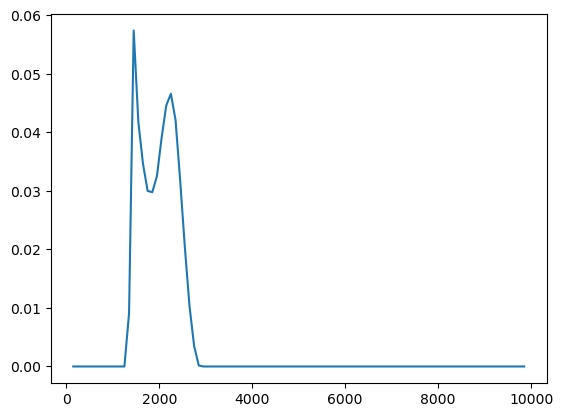

In [92]:
x = ds.CTH.isel(time=np.arange(220,230))


p, bin_edges = np.histogram(x, bins = np.arange(0, 10000, 100))

bins = (bin_edges[:-1] + bin_edges[1:])/2

plt.plot(bins[1:], p[1:] / np.sum(p))

'''with open('cloud_fraction_file_test.out', 'w') as f:
    for i in range(len(ds.CTH.time)):
     '''   

In [ ]:
circle = 1

for file in os.listdir(path):

    ds = xr.open_dataset(os.path.join(path, file))
    
    ds.Cls
    